In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'SimSun', 'KaiTi', 'FangSong']
plt.rcParams['axes.unicode_minus'] = False

# 读取处理后的数据
df = pd.read_csv('processed_imo_data.csv')

# 1. 国家参与度分析
print("1. 国家参与度分析")
print("-" * 50)

# 计算各国参与情况
participation = df.groupby('country').agg({
    'year': ['nunique', 'min', 'max'],
    'contestant': 'count'
}).round(2)

participation.columns = ['参与年数', '首次参与', '最近参与', '总参与人次']
participation = participation.sort_values('参与年数', ascending=False)

print("\n参与度最高的10个国家：")
print(participation.head(10))

# 可视化参与趋势
plt.figure(figsize=(15, 5))

# 年度参与国家数
plt.subplot(1, 2, 1)
yearly_countries = df.groupby('year')['country'].nunique()
yearly_countries.plot(marker='o')
plt.title('历年参与国家数量趋势')
plt.xlabel('年份')
plt.ylabel('国家数量')
plt.grid(True, alpha=0.3)

# 累计参与国家数
plt.subplot(1, 2, 2)
cumulative_countries = df.groupby('year')['country'].unique().cumsum().apply(len)
cumulative_countries.plot(marker='o')
plt.title('累计参与国家数量')
plt.xlabel('年份')
plt.ylabel('累计国家数量')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. 国家实力变迁分析
print("\n2. 国家实力变迁分析")
print("-" * 50)

# 计算各国历年平均分
yearly_performance = df.groupby(['year', 'country'])['total'].mean().unstack()

# 选择参与年数较多的主要国家
major_countries = participation[participation['参与年数'] >= 20].index.tolist()[:10]
major_country_scores = yearly_performance[major_countries]

plt.figure(figsize=(12, 6))
major_country_scores.plot(marker='o')
plt.title('主要国家历年平均分趋势')
plt.xlabel('年份')
plt.ylabel('平均分')
plt.legend(title='国家', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 3. 区域实力分析
print("\n3. 区域实力分析")
print("-" * 50)

# 定义主要地理区域
regions = {
    'East Asia': ['China', 'Japan', 'South Korea', 'North Korea'],
    'Southeast Asia': ['Vietnam', 'Thailand', 'Singapore', 'Philippines'],
    'South Asia': ['India', 'Iran', 'Pakistan', 'Bangladesh'],
    'Eastern Europe': ['Russia', 'Ukraine', 'Romania', 'Bulgaria', 'Poland'],
    'Western Europe': ['Germany', 'France', 'United Kingdom', 'Italy'],
    'North America': ['United States', 'Canada'],
    'Latin America': ['Brazil', 'Mexico', 'Argentina', 'Peru']
}

# 添加区域标签
df['region'] = df['country'].map({country: region 
                                 for region, countries in regions.items() 
                                 for country in countries})

# 计算区域表现
region_stats = df[df['region'].notna()].groupby('region').agg({
    'total': ['mean', 'std'],
    'award': lambda x: (x == 'Gold Medal').mean() * 100,
    'contestant': 'count'
}).round(2)

region_stats.columns = ['平均分', '标准差', '金牌率(%)', '参与人次']
print("\n各区域表现统计：")
print(region_stats.sort_values('平均分', ascending=False))

# 可视化区域表现
plt.figure(figsize=(15, 5))

# 区域平均分对比
plt.subplot(1, 2, 1)
region_stats['平均分'].sort_values().plot(kind='bar')
plt.title('各区域平均分对比')
plt.xlabel('区域')
plt.ylabel('平均分')
plt.xticks(rotation=45)

# 区域金牌率对比
plt.subplot(1, 2, 2)
region_stats['金牌率(%)'].sort_values().plot(kind='bar')
plt.title('各区域金牌率对比')
plt.xlabel('区域')
plt.ylabel('金牌率(%)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 4. 新兴力量分析
print("\n4. 新兴力量分析")
print("-" * 50)

# 计算各国在不同时期的表现
def calculate_period_performance(df, start_year, end_year):
    period_data = df[(df['year'] >= start_year) & (df['year'] <= end_year)]
    return period_data.groupby('country').agg({
        'total': 'mean',
        'award': lambda x: (x == 'Gold Medal').mean() * 100,
        'contestant': 'count'
    })

# 分析两个时期：早期和近期
early_period = calculate_period_performance(df, df['year'].min(), 2000)
recent_period = calculate_period_performance(df, 2001, df['year'].max())

# 计算进步最大的国家
progress = pd.DataFrame({
    '早期平均分': early_period['total'],
    '近期平均分': recent_period['total']
}).dropna()

progress['进步幅度'] = progress['近期平均分'] - progress['早期平均分']
progress = progress.sort_values('进步幅度', ascending=False)

print("\n进步最显著的10个国家：")
print(progress.head(10).round(2))

# 可视化进步最显著的国家
top_improved = progress.head(10).index

plt.figure(figsize=(12, 6))
for country in top_improved:
    country_data = df[df['country'] == country].groupby('year')['total'].mean()
    plt.plot(country_data.index, country_data.values, marker='o', label=country)

plt.title('进步最显著国家的得分趋势')
plt.xlabel('年份')
plt.ylabel('平均分')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


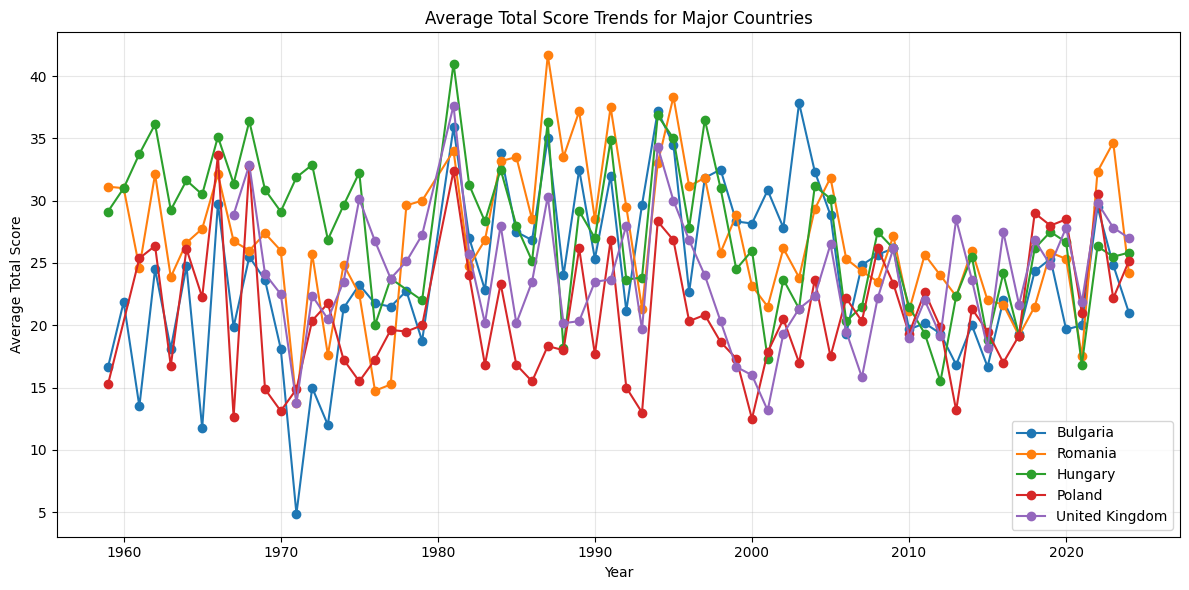

<Figure size 1200x600 with 0 Axes>

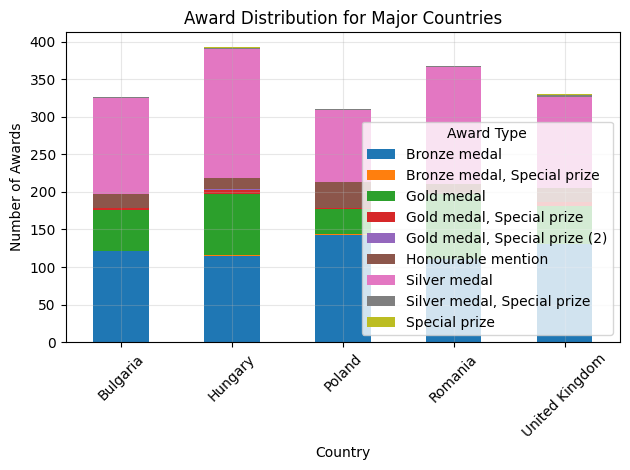

<Figure size 1200x600 with 0 Axes>

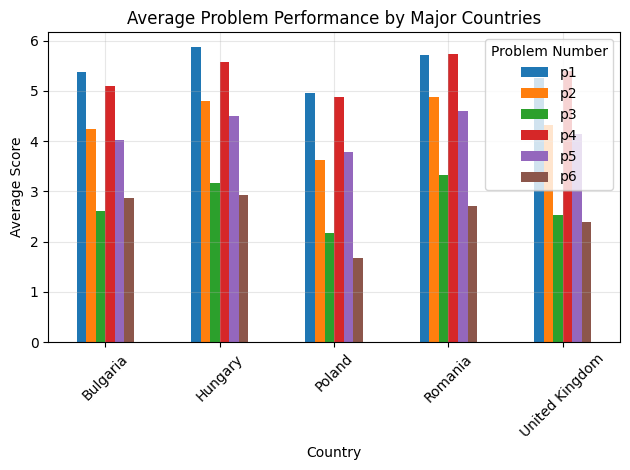

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplfonts.bin.cli import init
init()

import matplotlib
matplotlib.rcParams['font.family'] = 'Source Han Sans CN'
matplotlib.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('individual_results_df.csv')

# 获取参与年份最多的前5个国家
participation_years = df.groupby('country')['year'].nunique().sort_values(ascending=False)
top_5_countries = participation_years.head(5).index.tolist()

# 1. 总分趋势分析
plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = df[df['country'] == country].groupby('year')['total'].mean()
    plt.plot(country_data.index, country_data.values, label=country, marker='o')
plt.title('主要国家平均总分趋势')
plt.xlabel('年份')
plt.ylabel('平均总分')
plt.legend(title='国家')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. 奖项统计分析
award_counts = df[df['country'].isin(top_5_countries)].groupby(['country', 'award']).size().unstack(fill_value=0)
award_props = award_counts.div(award_counts.sum(axis=1), axis=0) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

award_counts.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('主要国家奖项分布')
ax1.set_xlabel('国家')
ax1.set_ylabel('获奖人数')
ax1.legend(title='奖项类型')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

award_props.plot(kind='bar', stacked=True, ax=ax2)
ax2.set_title('主要国家奖项比例')
ax2.set_xlabel('国家')
ax2.set_ylabel('比例(%)')
ax2.legend(title='奖项类型')
ax2.tick_params(axis='x', rotation=45)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. 不同题目的表现特征
problem_performance = df[df['country'].isin(top_5_countries)].groupby('country')[['p1', 'p2', 'p3', 'p4', 'p5', 'p6']].mean()

plt.figure(figsize=(12, 6))
problem_performance.plot(kind='bar')
plt.title('主要国家在各题目上的平均表现')
plt.xlabel('国家')
plt.ylabel('平均分')
plt.legend(title='题目编号')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. 实力演变分析
# 计算每个国家在不同时期的表现
df['decade'] = (df['year'] // 10) * 10
decade_performance = df[df['country'].isin(top_5_countries)].groupby(['decade', 'country'])['total'].mean().unstack()

plt.figure(figsize=(12, 6))
decade_performance.plot(marker='o')
plt.title('主要国家实力演变（按十年统计）')
plt.xlabel('年代')
plt.ylabel('平均总分')
plt.legend(title='国家')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 5. 竞争力对比分析
# 计算各项指标
country_stats = pd.DataFrame()
for country in top_5_countries:
    country_data = df[df['country'] == country]
    stats = {
        '平均总分': country_data['total'].mean(),
        '金牌率(%)': (country_data['award'] == 'Gold Medal').mean() * 100,
        '完成题数': country_data['problem_completion'].mean(),
        '最高分': country_data['total'].max(),
        '参与年数': country_data['year'].nunique()
    }
    country_stats[country] = pd.Series(stats)

country_stats = country_stats.round(2)
print('\n主要国家竞争力对比：')
print(country_stats)

# 雷达图展示竞争力
# 标准化数据
stats_normalized = (country_stats - country_stats.min()) / (country_stats.max() - country_stats.min())

# 设置雷达图参数
categories = list(stats_normalized.index)
num_vars = len(categories)
angles = [n / float(num_vars) * 2 * np.pi for n in range(num_vars)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

for country in top_5_countries:
    values = stats_normalized[country].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=country)
    ax.fill(angles, values, alpha=0.1)

plt.xticks(angles[:-1], categories)
plt.title('主要国家竞争力雷达图')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()
